* Credits - https://www.coursera.org/specializations/deep-learning
* https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish
* https://www.manning.com/books/deep-learning-with-python
* Reference Khoo Chen Shiang 

### Step 1 Import the Dataframe

* Import all necessary library 
* Import the data, for both training_set, and testing_set
* Split the dataset to X Input data set(i.e. 'Sex', 'Cabin', 'Fares and etc), and our Prediction-Y label, i.e. if a passenger Survived field
* I decide to drop PassengerId, Name and Ticket fields, as I don't think our training model will benefits from these fields

In [1]:
import numpy as np
import pandas as pd

from keras import models
from keras import layers
from keras import optimizers
from keras import losses 
from keras import metrics

import matplotlib.pyplot as plt

/Users/praneeshkhanna/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Read the the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#Droping passengerID, Name, Ticket, Survived as they are insignificant to target variable, found in feature engineering
X_train = train.drop(['PassengerId','Name','Ticket','Survived'], axis=1)
y_train = train['Survived']

X_test = test.drop(['PassengerId','Name','Ticket'], axis=1)

In [3]:
#Replacing mean age in null entries for Age column 
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

###  Step 2 Cleanup and Transform the Data

Transform all categorial values into numeric value for both Training and Testing data set

* Age

In [4]:
def simplify_ages(df):
    #df['Age'] = df['Age'].fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df['Age'], bins, labels=group_names)
    df['Age'] = categories.cat.codes 
    return df

* Cabins

In [5]:
def simplify_cabins(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
    df['Cabin'] =  pd.Categorical(df['Cabin'])
    df['Cabin'] = df['Cabin'].cat.codes 
    return df

* Fare

In [6]:
def simplify_fares(df):
    df['Fare'] = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df['Fare'], bins, labels=group_names)
    df['Fare'] = categories.cat.codes 
    return df

* Sex

In [7]:
def simplify_sex(df):
    df['Sex'] = pd.Categorical(df['Sex'])
    df['Sex'] = df['Sex'].cat.codes 
    return df

* Embarked 

In [8]:
def simplify_embarked(df):
    df['Embarked'] = pd.Categorical(df['Embarked'])
    df['Embarked'] = df['Embarked'].cat.codes + 1
    return df

In [9]:
def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = simplify_sex(df)
    df = simplify_embarked(df)
    return df

In [10]:
transform_features(X_train)
transform_features(X_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,5,0,0,1,7,2
1,3,0,6,1,0,1,7,3
2,2,1,7,0,0,2,7,2
3,3,1,5,0,0,2,7,3
4,3,0,4,1,1,2,7,3
5,3,1,3,0,0,2,7,3
6,3,0,5,0,0,1,7,2
7,2,1,5,1,1,3,7,3
8,3,0,3,0,0,1,7,1
9,3,1,4,2,0,3,7,3


### Step 3 Build the NN model using Keras

 3 Layers, first 2 layers with 32 hidden value with "Relu" activation function
 Last layer with Sigmoid activation function

In [11]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', 
                       input_shape=(8,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
#model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

### Step 3.1 Split the training data set with validation set, and run the model

Default validation set size is 50

In [12]:
y_train = np.asarray(y_train)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

validation_size = 200

X_val = X_train[:validation_size]
partial_X_train = X_train[validation_size:]

y_val = y_train[:validation_size]
partial_y_train = y_train[validation_size:]

In [13]:
history = model.fit(partial_X_train, partial_y_train, epochs=30, validation_data=(X_val, y_val))

Train on 691 samples, validate on 200 samples
Epoch 1/30
691/691 [==============================] - 1s 976us/step - loss: 0.5921 - binary_accuracy: 0.6946 - val_loss: 0.6231 - val_binary_accuracy: 0.6800
Epoch 2/30
691/691 [==============================] - 0s 113us/step - loss: 0.5428 - binary_accuracy: 0.7279 - val_loss: 0.5745 - val_binary_accuracy: 0.6900
Epoch 3/30
691/691 [==============================] - 0s 153us/step - loss: 0.5226 - binary_accuracy: 0.7366 - val_loss: 0.5536 - val_binary_accuracy: 0.7050
Epoch 4/30
691/691 [==============================] - 0s 207us/step - loss: 0.4982 - binary_accuracy: 0.7612 - val_loss: 0.5364 - val_binary_accuracy: 0.7250
Epoch 5/30
691/691 [==============================] - 0s 134us/step - loss: 0.4858 - binary_accuracy: 0.7713 - val_loss: 0.5356 - val_binary_accuracy: 0.7200
Epoch 6/30
691/691 [==============================] - 0s 183us/step - loss: 0.4693 - binary_accuracy: 0.7815 - val_loss: 0.5121 - val_binary_accuracy: 0.7350
Epoch 

#### Step 3.2 Plot accuracy and loss for both training and validation set, to check the model optimization level

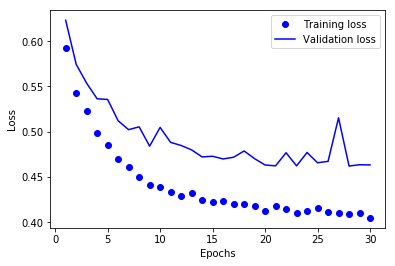

In [14]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

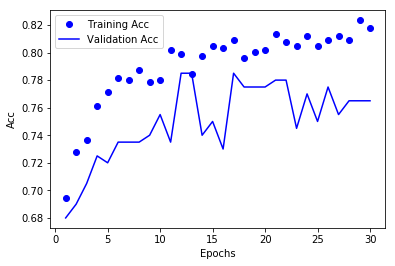

In [15]:
plt.clf()

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc,'b', label='Validation Acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

### Step 4 Optimization

Repeat Step 3 multiple times till we find best model for this dataset. 
Example:

- Will adding more hidden units or additional hidden layer help? 
- what if I change my activation function? 
- increase/decrease my learning rate?
- Will increase number of Epochs help?

In [16]:
predictions = model.predict_classes(X_test)
ids = test['PassengerId'].copy()
new_output = ids.to_frame()
new_output["Survived"]=predictions
new_output.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
